# 超市数据分析报告

### 22019207046 武佳

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('item-2018-06-01-2018-07-05.csv')  # 导入数据
data.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


# 一、数据基本情况及数据预处理

## 1.1数据预处理

### 1. 删除所有含有NAN的行

In [3]:
data.dropna(axis=0,how='any') 

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


### 2. 删除所有重复的行

In [4]:
#判断是否有重复的数据
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1732756    False
1732757    False
1732758    False
1732759    False
1732760    False
Length: 1732761, dtype: bool

In [5]:
#删除重复项
data1=data.drop_duplicates()
data1

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


### 3.删除异常数据

#### 通过公式计算实际折扣，将计算所得作为新的列添加到原数据中。为了比较实际折扣与表中已知的折扣，将两列数据均保留两位小数。筛选出实际折扣与已知折扣不相等的数据行，共5737行，异常数据占总体数据不足1%，删除后样本量仍然足够，对后续数据分析影响不大，故删除这些异常值。
#### 经过预处理，现样本数据data2的数据量为1,514,300条。

In [6]:
data1=data1.copy()
#将商品数量、商品售价和折扣中的负数变正数
data1["ITEM_QUANTITY"] = data1["ITEM_QUANTITY"].abs()
data1["ITEM_SPEND"] = data1["ITEM_SPEND"].abs()
data1["DISCOUNT_AMOUNT"] = data1["DISCOUNT_AMOUNT"].abs()

In [7]:
#计算实际折扣
data1['money']=data1['ITEM_QUANTITY'] *data1[ 'NORMAL_PRICE'] - data1['ITEM_SPEND']

In [8]:
#将实际折扣和表中已有的折扣值均保留两位小数
data1['DISCOUNT_AMOUNT'] = data1['DISCOUNT_AMOUNT'].apply(lambda x: round(x,2))
data1['money'] = data1['money'].apply(lambda y: round(y,2))

In [9]:
#计算实际折扣与已有折扣的差值，并将其添加到数据列表中
data1['chazhi']=data1['DISCOUNT_AMOUNT'] - data1['money']

In [10]:
#筛选出满足实际折扣与表中折扣相等的行,作为后续数据分析的样本数据
data2=data1[data1.chazhi.isin([0])] 
data2

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,money,chazhi
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,0.3,0.3,0.0
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,0.0,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,0.0,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,6.9,6.9,0.0
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0,0.0,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0,0.0,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0,0.0,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,0.5,0.5,0.0


## 1.2数据基本情况

### 1.商品种类

#### 超市共19264种商品，出现次数最多的前十名商品分别是：21835、194690、205540、72811、197532、205437、1557、75283、216571、198366。	

In [11]:
prod = list(data2['PROD_CODE'].unique())   # 列出该列的唯一值
len(prod) # 统计该列有多少个不一样的值

19264

In [12]:
b = pd.DataFrame(data2['PROD_CODE'].value_counts()) # 统计每个唯一值出现了多少次
b

,PROD_CODE
21835,10417
194690,9498
205540,8422
72811,7733
197532,6420
...,...
160227,1
205097,1
222763,1
220614,1


出现次数最多的前十名商品编号

In [13]:
bhead=b.head(10)
bhead

,PROD_CODE
21835,10417
194690,9498
205540,8422
72811,7733
197532,6420
205437,5945
1557,5549
75283,5338
216571,5073
198366,4860


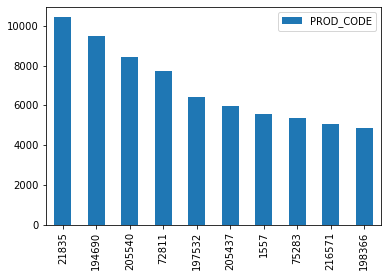

In [14]:
bhead.plot(kind='bar')

### 2.商店数量

#### 超市共有24个门店，其中A类门店有15家，D类门店有9家。

In [15]:
STORE = list(data2['STORE_CODE'].unique())   # 列出该列的唯一值
len(STORE) # 统计该列有多少个不一样的值

24

In [16]:
data2['STORE_CODE'].value_counts()

D002    211224
A001    170358
D007    102455
A008     94453
A013     73599
A006     67252
D004     66294
D006     58769
A012     56536
A021     55043
A009     50734
D008     49930
A016     48929
A019     45292
D005     44281
A007     43491
A010     42489
A004     39853
A018     39803
D009     39189
A022     38448
D010     30578
A017     25432
D003     19868
Name: STORE_CODE, dtype: int64

In [17]:
#A类店铺的数量
A=data2.loc[data['STORE_CODE'].str.contains('A')]
STORE_A = list(A['STORE_CODE'].unique())   # 列出该列的唯一值
len(STORE_A)

15

In [18]:
#D类店铺的数量
D=data2.loc[data['STORE_CODE'].str.contains('D')]
STORE_D = list(D['STORE_CODE'].unique())   # 列出该列的唯一值
len(STORE_D)

9

### 3.购物篮数量

#### 不重复的购物篮编码，共有280990个。正常情况下，一个购物篮编码对应一次购买行为，但是通过浏览数据，同样的购物篮编码对应一次或几次购买行为，如编码为205154的购物篮，在数据中共出现60次，这60次出现在不同的时间甚至门店。因此，购物篮编码不能单独用作统计交易次数的依据。故将时间和购物篮编码组合成为新的一列，使得购物篮编码唯一。

In [19]:
bask = list(data2['BASK_CODE'].unique())   # 列出该列的唯一值
len(bask) # 统计该列有多少个不一样的值

280990

In [20]:
bask_n = pd.DataFrame(data2['BASK_CODE'].value_counts()) # 统计每个唯一值出现了多少次
bask_n

,BASK_CODE
205154,60
37307,59
211486,53
161504,53
36227,53
...,...
6728,1
12877,1
33972,1
72296,1


In [21]:
#将日期和购物篮编码合并作为新的一列，插入到第4列
basket = data2["SDATE"] +data2["BASK_CODE"].map(str)
data2.insert(4,'basket_code',basket)
data2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,basket_code,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,money,chazhi
0,2018-06-01,D007,3,250451,2018-06-01250451,29405,1.000,1.70,2.0,m,0.3,0.3,0.0
1,2018-06-01,D007,3,250451,2018-06-01250451,13187,1.000,1.00,1.0,n,0.0,0.0,0.0
2,2018-06-01,D007,3,250243,2018-06-01250243,196249,1.000,99.00,99.0,m,0.0,0.0,0.0
3,2018-06-01,D007,3,250243,2018-06-01250243,199637,1.000,9.90,16.8,p,6.9,6.9,0.0
4,2018-06-01,D007,1,160905,2018-06-01160905,195012,3.222,18.69,5.8,n,0.0,-0.0,0.0


In [22]:
basket_n = pd.DataFrame(data2['basket_code'].value_counts()) # 统计每个唯一值出现了多少次
basket_n.head()

,basket_code
2018-07-05224729,52
2018-06-10147354,49
2018-06-10149308,48
2018-06-0536227,44
2018-06-1858264,44


### 4.打折类型

#### 共有9种打折方式，分别是n,p,m,v,x,q,Z,s,h

In [23]:
disc = list(data2['DISCOUNT_TYPE'].unique())   # 列出该列的唯一值
len(disc) # 统计该列有多少个不一样的值

9

In [24]:
disc_n = pd.DataFrame(data2['DISCOUNT_TYPE'].value_counts()) # 统计每个唯一值出现了多少次
disc_n

,DISCOUNT_TYPE
n,1052404
p,311911
m,131943
v,11851
x,4530
q,1458
Z,196
s,6
h,1


### 5.时间

#### 数据记录了超市从2018-6-1到2018-7-5，共35天的销售记录，其中6月17日消费次数高达25817次，其次是6月18日和6月19日，均突破了2万次，明显高于其他时间，后续可以分析出现此现象的原因。下表显示了消费次数最多的前十天。

In [25]:
date = list(data2['SDATE'].unique())   # 列出该列的唯一值
len(date) # 统计该列有多少个不一样的值

35

In [26]:
#交易次数最多的10天
date_n=data2[['SDATE','basket_code',]].groupby('SDATE').nunique()
date_n.rename(columns={'SDATE':'111'}, inplace = True)#更改列名
del date_n['111']
date_n.sort_values(ascending=False,by='basket_code').head(10)

,basket_code
SDATE,
2018-06-17,25817
2018-06-18,23656
2018-06-16,21389
2018-06-13,18944
2018-06-02,18381
2018-06-10,18294
2018-06-15,17654
2018-06-01,17576
2018-07-01,17436


# 二、数据分析

## 2.1店铺销售情况

In [27]:
#为了直观的显示数字，不采用科学计数法
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

### 1.各店铺的销售额

#### 下表及图展示了各店铺35天的销售额情况，其中A001店铺的销售额最高，是3103098.63元；售额过百万的店铺有A001，D002，D007，A008，A013；销售额最低的店铺是D003，销售额只有241674.49元。企业应该去找出销售额的店铺的原因，去解决问题，提高销售额。

In [28]:
df_store=data2[['STORE_CODE','ITEM_SPEND',]].groupby('STORE_CODE').sum()
df_store.sort_values(ascending=False,by='ITEM_SPEND')#降序排列 

,ITEM_SPEND
STORE_CODE,
A001,3103098.63
D002,2939895.03
D007,1274325.82
A008,1250599.48
A013,1018381.03
A006,846284.97
A012,812873.32
A009,769504.18
D004,760443.64


<function matplotlib.pyplot.show(*args, **kw)>

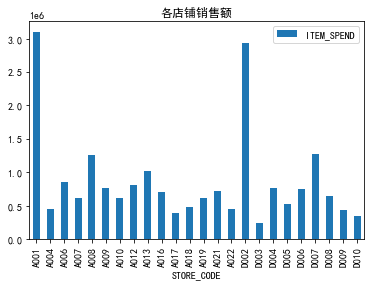

In [29]:
plt.rcParams["font.sans-serif"]='SimHei'
df_store.plot(kind='bar',title='各店铺销售额')
plt.show

### 2. 各店铺的商品数量

#### 下表及图展示了各店铺商品数量的情况，其中店铺D002的商品数量最多，共有10797种商品；有5000种以上商品的店铺分别是D002，A001，D007，A013，A008，D006；店铺D003有2894种商品，是这24家店铺中商品数量最少的店铺。

In [30]:
#每个店铺中的商品数量
B=data2.groupby(['STORE_CODE']).PROD_CODE.nunique()
#降序排列
B.sort_values(ascending=False)


STORE_CODE
D002    10797
A001     7592
D007     6466
A013     5443
A008     5282
D006     5035
A012     4969
D008     4927
A021     4811
A006     4755
D004     4670
A009     4596
A007     4584
A010     4494
A022     4316
A016     4264
D005     4247
A018     4173
D009     4147
A019     3678
D010     3653
A004     3574
A017     3290
D003     2894
Name: PROD_CODE, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

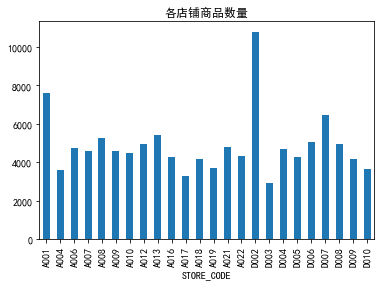

In [31]:
plt.rcParams["font.sans-serif"]='SimHei'
B.plot(kind='bar',title='各店铺商品数量')
plt.show

### 3.  A、D两类店铺的销售额趋势

In [32]:
#A类店铺每天的销售额
A_SPEND=A[['SDATE','ITEM_SPEND']].groupby('SDATE').sum()
A_SPEND.rename(columns={'ITEM_SPEND':'A_SPEND'}, inplace = True)#更改列名
A_SPEND

,A_SPEND
SDATE,
2018-06-01,339164.44
2018-06-02,325172.02
2018-06-03,304963.88
2018-06-04,227887.71
2018-06-05,256051.69
2018-06-06,296345.30
2018-06-07,245125.88
2018-06-08,332240.77
2018-06-09,414456.64


#### 下图展示的是A类店铺从2018-6-1到2018-7-5期间的总体销售额趋势。可以很明显的看到在6-16到6-18这三天A类店铺销售额有明显的涨幅，在6月17日达到了峰值，在18日之后销售额又趋于平稳，回归了日常状态。后续就可以借此分析出现销售额明显增长的原因，是由于店铺的营销活动，或是其他原因，结合店铺的实际情况，可以找出销售额突然增长的原因。

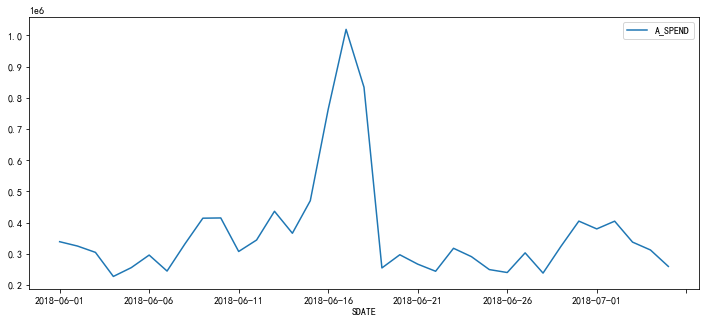

In [33]:
#A类店铺销售额趋势
plt.rcParams['figure.figsize'] = (12.0, 5.0)#调整画布尺寸大小
A_SPEND.plot()
plt.show()

#### 下图是D类店铺从2018-6-1到2018-7-5期间的总体销售额趋势，可以看出D类店铺的销售额总体较低，上下浮动不大，后续可以找出D类店铺出现问题的原因，有针对性的提出解决方案。

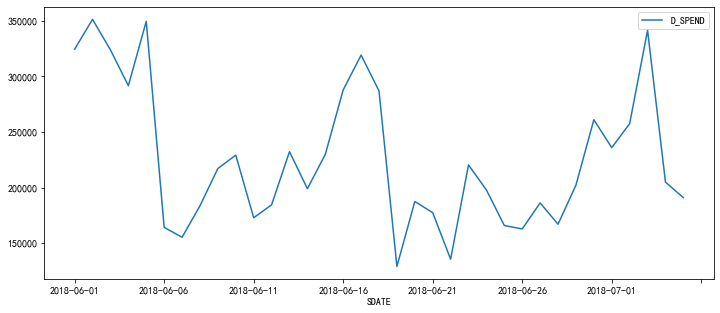

In [34]:
#D类店铺每天的销售额
D_SPEND=D[['SDATE','ITEM_SPEND']].groupby('SDATE').sum()
D_SPEND.rename(columns={'ITEM_SPEND':'D_SPEND'}, inplace = True)
plt.rcParams['figure.figsize'] = (12.0, 5.0)#调整画布尺寸大小
D_SPEND.plot()
plt.show()

#### 将A类店和D类店的销售额变化趋势放在同一张表中，可以更直观的比较两类店铺的经营情况。两类店铺在此期间的销售额变化趋势基本保持一致，除16-18日的明显增长，两类店铺的日常经营比较稳定，销售额波动不大；但是D类店铺的销售额明显低于A类店铺，经营效益较差，后续需要与A类店铺做对比，找出效益低的原因，有针对性的改进，提升经营情况和销售额。

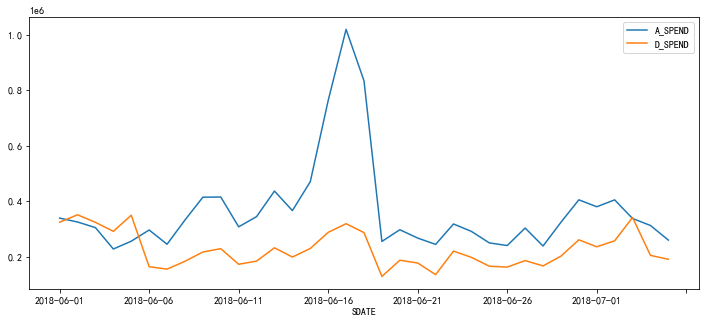

In [35]:
#将A、D的销售额趋势显示在同一张表中
AD=pd.merge(A_SPEND, D_SPEND,on='SDATE')#将A和D合并为一个dataframe，通过相同的键

plt.rcParams['figure.figsize'] = (12.0, 5.0)#调整画布尺寸大小
AD.plot()
plt.show()

### 4. 门店的交易次数

#### 下表显示了每个门店发生的交易次数，发生交易次数最多的是A001店铺，其次是D002和D007，根据上面对每个店铺销售额、商品数量的统计，这三家店铺稳居前列，说明这三家店铺的经营状况较好。

In [36]:
store_n=data2[['STORE_CODE','basket_code',]].groupby('STORE_CODE').nunique()
store_n.rename(columns={'STORE_CODE':'111'}, inplace = True)#更改列名
del store_n['111']
store_n.sort_values(ascending=False,by='basket_code')

,basket_code
STORE_CODE,
A001,66377
D002,62925
D007,37526
A008,36533
A013,30030
A006,28443
A012,25023
A009,21870
D004,21406


## 2.2. 商品销售情况

### 1 销量排名前十和排名末尾的各10种商品

#### 下表显示了超市总体销售量排名前十的商品编码，可以看出编码为149413的商品销量最好，高达37826件；在后续经营决策中可以考虑增加此种商品的库存，或增加同类型产品，防止缺货，以提高销售额。同理销量排名末尾的商品，可以经过一段时间的观察统计，决定是否要下架不再进行售卖，或者考虑用新品类替代。

In [37]:
#销量排名前十的商品编码及其销量
df_store=data2[['PROD_CODE','ITEM_QUANTITY',]].groupby('PROD_CODE').sum()
df_store.sort_values(ascending=False,by='ITEM_QUANTITY').head(10)#降序排列 

,ITEM_QUANTITY
PROD_CODE,
149413,37826.00
86772,28774.00
220834,24187.00
61623,21390.00
124556,18795.00
194690,18087.80
1152,17727.00
124554,15757.00
205540,15096.00


In [38]:
#销量排名末尾的10种商品及其销量
df_store.sort_values(ascending=False,by='ITEM_QUANTITY').tail(10)

,ITEM_QUANTITY
PROD_CODE,
152624,0.11
207123,0.10
221623,0.10
209747,0.09
178247,0.09
223171,0.09
189718,0.06
24925,0.05
56482,0.05


### 2 A类店铺和D类销量排名前十的商品编码及销量

#### 下面两张表是A类店铺和D类销量排名前十的商品编码及销售量，与上述建议相似，各店铺可根据自己的商品销量情况，调整商品结构。

In [39]:
#A类店铺销售数量前十的商品编码
PROD_NUM_Ashop=A[['PROD_CODE','ITEM_QUANTITY',]].groupby('PROD_CODE').sum()
PROD_NUM_Ashop.sort_values(ascending=False,by='ITEM_QUANTITY').head(10)

,ITEM_QUANTITY
PROD_CODE,
149413,29866.00
86772,16175.00
220834,15511.00
7133,13610.00
4463,11878.00
124556,11464.00
19211,11458.00
61623,11225.00
124554,10892.00


In [40]:
#D类店铺销售数量前十的商品编码
PROD_NUM_Dshop=D[['PROD_CODE','ITEM_QUANTITY',]].groupby('PROD_CODE').sum()
PROD_NUM_Dshop.sort_values(ascending=False,by='ITEM_QUANTITY').head(10)

,ITEM_QUANTITY
PROD_CODE,
86772,12599.00
1152,12488.00
61623,10165.00
223630,9855.00
220834,8676.00
149413,7960.00
191955,7945.00
130567,7930.41
194690,7885.75


### 3 店铺A001商品销售量前十名的商品编码及销量
#### 其余每家店铺的统计情况一致，此处用店铺A001举例

In [41]:
A001=data2[data2['STORE_CODE'].isin(['A001'])]#筛选店铺A001的数据记录
PROD_NUM_A001=A001[['PROD_CODE','ITEM_QUANTITY',]].groupby('PROD_CODE').sum()
PROD_NUM_A001.sort_values(ascending=False,by='ITEM_QUANTITY').head(10)

,ITEM_QUANTITY
PROD_CODE,
149413,11774.00
220834,8173.00
1157,3686.00
10270,3040.00
155493,2796.00
205540,2659.00
19211,2350.00
132236,2341.00
86772,2323.00


### 4 商品价格箱型图分析

#### 由最后的箱型图可知，商品价格最多的在3.9元~15.8元之间，符合消费者在零售商店购买的商品价格会比较低，店家可以根据消费者的消费情况对商品进行调整，上架一些平价、常用的日用商品

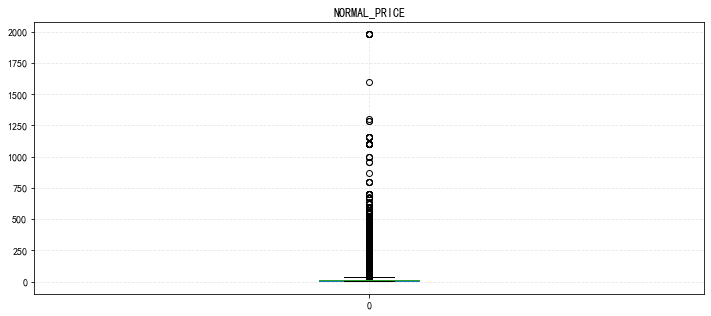

In [42]:
normal_price_array = np.array(data2['NORMAL_PRICE'])
 
df = pd.DataFrame(normal_price_array)
df.plot.box(title="NORMAL_PRICE")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

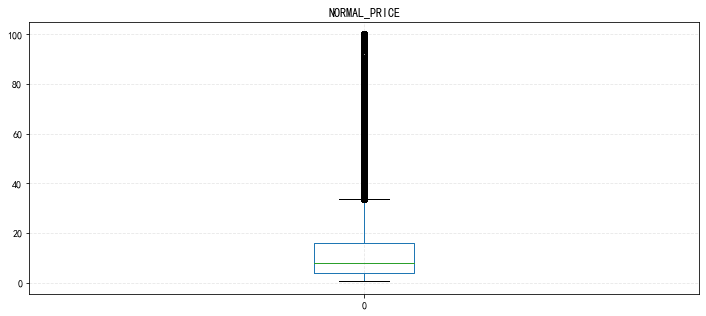

In [43]:
#商品价格0-100价格箱型图分析
item_normal=data2.loc[(data2['NORMAL_PRICE']<=100)]

normal_price_array = np.array(item_normal['NORMAL_PRICE'])
df = pd.DataFrame(normal_price_array)
df.plot.box(title="NORMAL_PRICE")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [44]:
#求商品价格的四分位数
df_1 = pd.to_numeric(item_normal['NORMAL_PRICE'])
q = [df_1.quantile(i) for i in [0,.25,.5,.75,1]];q[-1] += 1
q

[0.5, 3.9, 8.0, 15.8, 101.0]

## 2.3 销售行为分析

In [45]:
print(data2.dtypes)

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
basket_code         object
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
money              float64
chazhi             float64
dtype: object


#### 数据类型中的object表示如果一列中含有多个类型,则该列的类型会是object,同样字符串类型的列也会被当成object类型，因此数据类型中object类型需要调整。此外为方便计算，涉及编号的数据类型应为String类型，SDATE数据类型应为日期类型，
1)调整编号数据类型
2)调整日期数据类型
3)调整后数据类型

In [46]:
#取消警告显示
import warnings
warnings.filterwarnings("ignore")
#编号数据类型  
data2["STORE_CODE"] = data2["STORE_CODE"].astype(str)
data2["POSID"] = data2["POSID"].astype(str)
data2["basket_code"] = data2["basket_code"].astype(str)
data2["PROD_CODE"] = data2["PROD_CODE"].astype(str)

### 1 日销售额与日销售量统计

#### 下面计算与折线图分组显示了日销售额与日销售量的数据，并绘制了折线图进行趋势对比分析，由图中可知，销售量与销售额的趋势几乎相同，且均在2018年6月16日达到最高，说明这天的进店人数和每个人的消费金额都较高。

In [47]:
#分组计算每日销售额与销售量
item_spend_date = data2.groupby("SDATE").sum().ITEM_SPEND
item_num_date = data2.groupby("SDATE").sum().ITEM_QUANTITY
labels = data2['SDATE'].unique()

Text(0.5, 1.0, '日销售量分析')

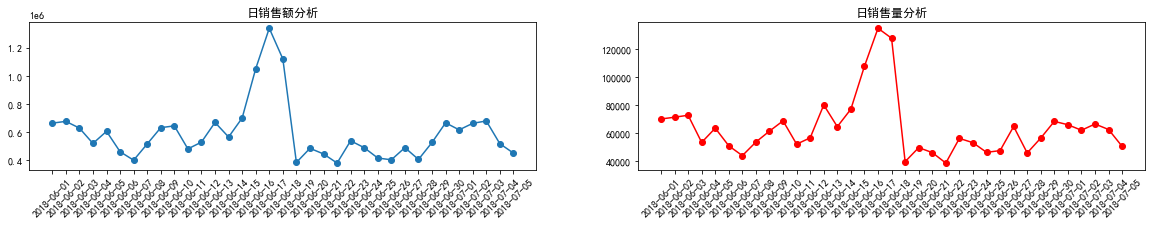

In [48]:
#分别绘制每日销售额、销售量折线图
#设置画布大小
plt.figure(figsize=(20,6))

plt.subplot(2,2,1)
plt.plot(item_spend_date,marker="o")
plt.xticks(rotation=45)
plt.title("日销售额分析")

plt.subplot(2,2,2)
plt.plot(item_num_date,marker="o",color='red')
plt.xticks(rotation=45)
plt.title("日销售量分析")

### 2 购物时间偏好

#### 下表是统计每天的消费次数，下图是每周七天的消费次数折线图，很明显的看出周六和周日两天的进店消费人数最多，说明人们的生活习惯及时间上的安排，更愿意每周末去超市购物。

In [49]:
#将日期转换为星期
data2['SHOP_WEEKTIME']=''
data2['SHOP_WEEKTIME']=data2['SDATE']
data2['SHOP_WEEKTIME'] = pd.to_datetime(data2['SHOP_WEEKTIME'])
data2['SHOP_WEEKTIME'] = data2['SHOP_WEEKTIME'].apply(lambda x: x.weekday() + 1)
data2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,basket_code,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,money,chazhi,SHOP_WEEKTIME
0,2018-06-01,D007,3,250451,2018-06-01250451,29405,1.00,1.70,2.00,m,0.30,0.30,0.00,5
1,2018-06-01,D007,3,250451,2018-06-01250451,13187,1.00,1.00,1.00,n,0.00,0.00,0.00,5
2,2018-06-01,D007,3,250243,2018-06-01250243,196249,1.00,99.00,99.00,m,0.00,0.00,0.00,5
3,2018-06-01,D007,3,250243,2018-06-01250243,199637,1.00,9.90,16.80,p,6.90,6.90,0.00,5
4,2018-06-01,D007,1,160905,2018-06-01160905,195012,3.22,18.69,5.80,n,0.00,-0.00,0.00,5


In [50]:
bask = data2.groupby('SHOP_WEEKTIME')['basket_code'].nunique()
bask = bask.to_frame().reset_index()
bask.columns = ['WEEK', 'BASK_NUM']
bask

,WEEK,BASK_NUM
0,1,81195
1,2,71674
2,3,81901
3,4,70091
4,5,77476
5,6,89882
6,7,94017


Text(0.5, 1.0, '周一至周日每天的消费次数')

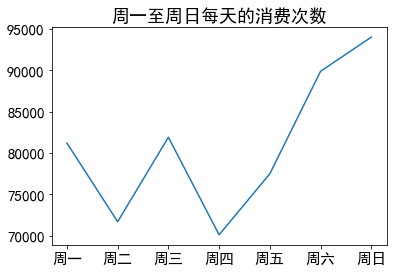

In [51]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = "15"
weeks=['周一','周二','周三','周四','周五','周六','周日']
plt.plot(weeks,bask["BASK_NUM"])
plt.title('周一至周日每天的消费次数')

# 三 总结

#### 此次超市原始样本数据共1,732,761条，经过数据处理及数据清洗，有效数据为1,514,300条。
#### 数据的基本情况如下：
数据记录了超市从2018-6-1到2018-7-5，共35天的销售记录。超市共19264种商品，出现次数最多的前十名商品分别是：21835、194690、205540、72811、197532、205437、1557、75283、216571、198366。超市共有24个门店，其中A类门店有15家，D类门店有9家。共有9种打折方式，分别是n、p、m、v、x、q、Z、s、h。交易次数最多的前3天分别是6.17,6.18和6.16。
#### 店铺销售情况统计分析中能够，得到如下结论：
各店铺销售额统计中，其中A001店铺的销售额最高，是3103098.63元；售额过百万的店铺有A001，D002，D007，A008，A013；销售额最低的店铺是D003，销售额只有241674.49元。
各店铺商品数量的情况，其中店铺D002的商品数量最多，共有10797种商品；有5000种以上商品的店铺分别是D002，A001，D007，A013，A008，D006；店铺D003有2894种商品，是这24家店铺中商品数量最少的店铺。
A类店铺和D类店铺在销售额趋势对比中，可以清楚看出两类店铺的销售额走势基本保持一致，同时在6.16-6.18这三天出现波峰，其余时间销售额情况基本保持在较为稳定的一个状态。但是D类店铺的销售额明显低于A类店铺，经营效益较差，后续需要与A类店铺做对比，找出效益低的原因，有针对性的改进，提升经营情况和销售额。
在这35天中，发生交易次数最多的是A001店铺，其次是D002和D007店铺，说明这三家店铺经营状况良好。
#### 商品维度销售情况统计分析中能够，得到如下结论：
超市总体销售量排名前十的商品编码，可以看出编码为149413的商品销量最好，高达37826件；其次是商品86772，220834，61623，124556，194690，1152，124554，205540，7133。销量排名末尾的10种商品为152624，207123，221623，209747，178247，223171，189718，24925，56482，207282。
同样的分析方式，还统计了A类店铺和D类店铺各自销量排名前十位和末尾十位的商品，其中还以A001店铺为例，找出了A001店铺销量好和销量差的商品，具体商品见上2.2部分。
对商品价格通过箱型图进行分析，其中商品价格在3.9元~15.8元之间的商品数量最多。
#### 销售行为分析结果如下：
日销售量与日销售额的趋势几乎相同，且均在2018年6月16日达到最高，说明这天的进店人数和每个人的消费金额都较高。
在购物时间偏好中，周六和周日两天是超市交易次数最高的时间，说明购物时间与人们的工作作息和生活习惯密切相关。
